In [7]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.model_selection import train_test_split

In [8]:
# Define the data directory
data_dir = "Downloads/EuroSAT_RGB/EuroSAT_RGB"

In [9]:
# List all the classes
try:
    classes = os.listdir(data_dir)
    print("Classes found:", classes)
except Exception as e:
    print(f"Error reading data directory: {e}")
    classes = []

Classes found: ['AnnualCrop', 'Forest', 'HerbaceousVegetation', 'Highway', 'Industrial', 'Pasture', 'PermanentCrop', 'Residential', 'River', 'SeaLake']


In [10]:
# Function to check if a file is an image
def is_image_file(filename):
    return filename.lower().endswith(('.png', '.jpg', '.jpeg', '.tiff', '.bmp', '.gif', 'JPG'))

In [11]:
# Load images and labels
images = []
labels = []

In [12]:
for label, class_name in enumerate(classes):
    class_dir = os.path.join(data_dir, class_name)
    print(f"\nProcessing class: {class_name}, path: {class_dir}")
    
    try:
        files = os.listdir(class_dir)
        print(f"Files in {class_name}: {files[:5]}...")  # Print the first 5 files 
    except Exception as e:
        print(f"Error reading directory {class_dir}: {e}")
        continue
    
    for file_name in files:
        image_path = os.path.join(class_dir, file_name)
        print(f"Checking file: {image_path}")  # Print each file path 
        if is_image_file(file_name):
            try:
                print(f"Loading image: {image_path}")
                image = Image.open(image_path).resize((64, 64))
                images.append(np.array(image))
                labels.append(label)
            except Exception as e:
                print(f"Error loading image {image_path}: {e}")
        else:
            print(f"Skipping non-image file: {file_name}")


Processing class: AnnualCrop, path: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop
Files in AnnualCrop: ['AnnualCrop_1.jpg', 'AnnualCrop_10.jpg', 'AnnualCrop_100.jpg', 'AnnualCrop_1000.jpg', 'AnnualCrop_1001.jpg']...
Checking file: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_1.jpg
Loading image: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_1.jpg
Checking file: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_10.jpg
Loading image: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_10.jpg
Checking file: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_100.jpg
Loading image: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_100.jpg
Checking file: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_1000.jpg
Loading image: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_1000.jpg
Checking file: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_1001.jpg
Loading image: Downloads/EuroSAT_RGB/EuroSAT_RGB\AnnualCrop\AnnualCrop_1001.

In [13]:
images = np.array(images)
labels = np.array(labels)

In [14]:
print(f"Total images loaded: {len(images)}")
print(f"Total labels loaded: {len(labels)}")

Total images loaded: 27000
Total labels loaded: 27000


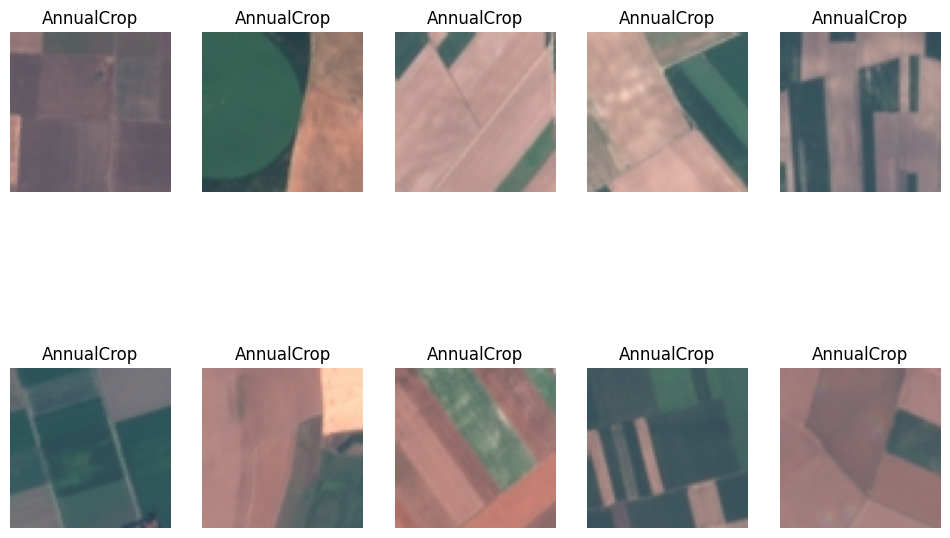

In [15]:
# Display some sample images if there are any
if len(images) > 0:
    plt.figure(figsize=(12, 8))
    for i in range(10):
        plt.subplot(2, 5, i + 1)
        plt.imshow(images[i])
        plt.title(classes[labels[i]])
        plt.axis('off')
    plt.show()
else:
    print("No images to display.")

In [16]:
# Normalize images
if len(images) > 0:
    images = images / 255.0

    # Split the data
    X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.4, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

    print(f"Training set: {X_train.shape}, {y_train.shape}")
    print(f"Validation set: {X_val.shape}, {y_val.shape}")
    print(f"Test set: {X_test.shape}, {y_test.shape}")
else:
    print("No images to process.")

Training set: (16200, 64, 64, 3), (16200,)
Validation set: (5400, 64, 64, 3), (5400,)
Test set: (5400, 64, 64, 3), (5400,)


Building the CNN Model

In [17]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [18]:
# Define the model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(classes), activation='softmax')
])

In [19]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 128)        0

Train the Model using training data and validate it using validation data

In [20]:
# Train the model
history = model.fit(X_train, y_train, epochs=15, validation_data=(X_val, y_val), batch_size=32)

Epoch 1/15
507/507 [==============================] - 65s 126ms/step - loss: 1.5631 - accuracy: 0.3819 - val_loss: 1.3184 - val_accuracy: 0.5222
Epoch 2/15
507/507 [==============================] - 54s 106ms/step - loss: 1.1423 - accuracy: 0.5793 - val_loss: 0.9398 - val_accuracy: 0.6531
Epoch 3/15
507/507 [==============================] - 51s 100ms/step - loss: 0.9468 - accuracy: 0.6606 - val_loss: 0.7057 - val_accuracy: 0.7481
Epoch 4/15
507/507 [==============================] - 52s 103ms/step - loss: 0.8335 - accuracy: 0.7006 - val_loss: 0.6604 - val_accuracy: 0.7626
Epoch 5/15
507/507 [==============================] - 54s 106ms/step - loss: 0.7782 - accuracy: 0.7282 - val_loss: 0.6462 - val_accuracy: 0.7744
Epoch 6/15
507/507 [==============================] - 52s 103ms/step - loss: 0.7177 - accuracy: 0.7452 - val_loss: 0.6094 - val_accuracy: 0.7937
Epoch 7/15
507/507 [==============================] - 54s 106ms/step - loss: 0.6634 - accuracy: 0.7648 - val_loss: 0.5898 - val_ac

Model's accuracy and loss metrics are not improving over the epochs at 25. Both training and validation accuracy remain around 11%, and the loss remains high. We tried to reduce the epochs with 15 and the training output had shows significant improvement compared to the previous results. Now, Evaluating the test set.

In [21]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {test_accuracy}")

169/169 [==============================] - 3s 19ms/step - loss: 0.3795 - accuracy: 0.8741
Test accuracy: 0.8740741014480591


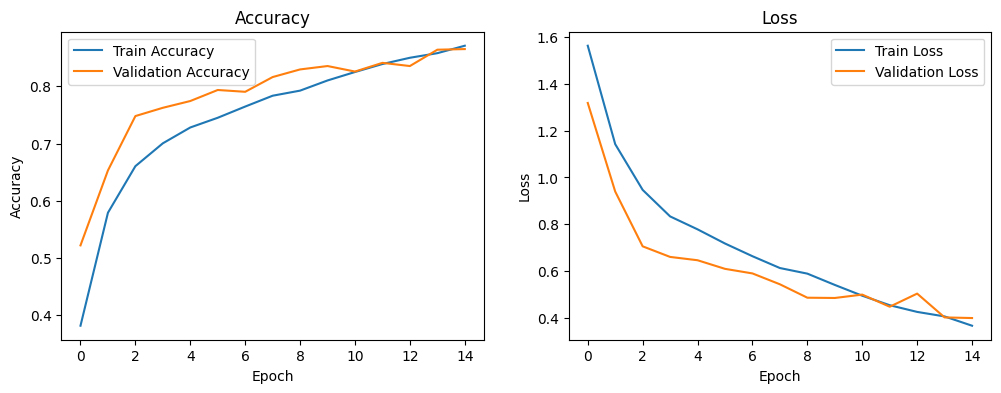

In [22]:
# Visualize Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss')

plt.show()

In [23]:
model.save('satellite_image_classifier.h5')